# Quality Prediction



## Project Canvas

### Background



Coffee roasting is the process of turning green coffee beans into brown ones. Brown coffee beans can be made in a variety of methods, which also influences the flavor of the end product. A roasting instrument is basically a convection oven. It is a mechanism of inflicting heat energy into the raw product which makes the product consumable. The price of coffee is heavily influenced by the quality of the beans after roasting. As a result, the cost can be determined depending on the quality of the beans after roasting.

The rising automation in the manufacturing business necessitates the automation of quality inspection of output products with minimal human intervention. Quality inspectors in businesses examine product quality after it is manufactured to ensure that it meets industry standards.

Each product's quality inspection is a time-consuming manual process, and a low-quality product wastes upstream factory capacity, consumables, labor, and money. With the emerging AI trend and IoT devices, companies are looking to leverage machine learning-based technologies to automate material quality inspection during the manufacturing process to reduce human intervention while achieving human-level or better accuracy.


### Value Proposition



A roasting corporation needs to predict the quality of a roasting instrument's outputs, which will be used to determine the price of coffee beans. The quality value ranges from 0 to 100 with 0 being the worst and 100 being the best. The higher the quality of the beans, the higher the price.

* Possible revenue increase due to higher coffee bean pricing

### Objective

* Build a regression model to predict quality of the coffee bean

### Methodology and Approach

1. Perform some ***basic data analysis and exploratory analysis***.
2. Decide the ***models that will be used***.
3. Define which ***metrics will be used*** to optimize on and judge model performance.
4. Perform ***model data pre-processing and prepration***.
     - Data Cleansing (missing, duplicates, etc..) - Imputation
     - Feature Engineering
     - Choose Sampling techniques to be used
     - Choose Scaling techniques to be used
     - Split the data data in training and test sets
5. ***Train models***.
     - For each model type:
        - Use *default parameters*, then score against the test/validation dataset.
         - Then, perform *hyper-parameter tuning* on the best performing default models to find the best parameters, retrain and rescore.
       - Select the best parameter set for each model.
6. Select the ***best model*** based on the metrics you have defined
7. Give the observations / feedback / recommendations

### Data Description



**Data Dictionary**

The coffee roasting instrument used is divided into five equal-sized compartments, each with three temperature sensors. 3 sensors have been installed at 3 different locations to be able to capture temperature at different locations inside the chamber. Additionally, the height of raw material (volume entering the chamber) and relative humidity of roasted material is provided.

The data shared consists of 17 predictor variables and a continuous target variable, and the aim is to build a Regression model which can accurately predict the quality of the product. After finding out the quality, the company can decide the cost of beans effectively.

- T_data_1_1 - Temperature recorded by 1st sensor in the 1st chamber in Fahrenheit
- T_data_1_2 - Temperature recorded by 2nd sensor in the 1st chamber in Fahrenheit
- T_data_1_3 - Temperature recorded by 3rd sensor in the 1st chamber in Fahrenheit
- T_data_2_1 - Temperature recorded by 1st sensor in the 2nd chamber in Fahrenheit
- T_data_2_2 - Temperature recorded by 2nd sensor in the 2nd chamber in Fahrenheit
- T_data_2_3 - Temperature recorded by 3rd sensor in the 2nd chamber in Fahrenheit
- T_data_3_1 - Temperature recorded by 1st sensor in the 3rd chamber in Fahrenheit
- T_data_3_2 - Temperature recorded by 2nd sensor in the 3rd chamber in Fahrenheit
- T_data_3_3 - Temperature recorded by 3rd sensor in the 3rd chamber in Fahrenheit
- T_data_4_1 - Temperature recorded by 1st sensor in the 4th chamber in Fahrenheit
- T_data_4_2 - Temperature recorded by 2nd sensor in the 4th chamber in Fahrenheit
- T_data_4_3 - Temperature recorded by 3rd sensor in the 4th chamber in Fahrenheit
- T_data_5_1 - Temperature recorded by 1st sensor in the 5th chamber in Fahrenheit
- T_data_5_2 - Temperature recorded by 2nd sensor in the 5th chamber in Fahrenheit
- T_data_5_3 - Temperature recorded by 3rd sensor in the 5th chamber in Fahrenheit
- H_data - Height of Raw material layer, basically represents the volume of raw material going inside the chamber in pounds.
- AH_data - Roasted Coffee beans relative humidity.
- quality -  Quality of the beans

## Importing necessary libraries and data

In [300]:
# Libraries to help with reading and manipulating data
import pandas as pd
import numpy as np

# Libaries to help with data visualization
import matplotlib.pyplot as plt
import seaborn as sns

# To tune model, get different metric scores, and split data
from sklearn import metrics
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error

from sklearn.model_selection import train_test_split, StratifiedKFold, cross_val_score

# To be used for data scaling and one hot encoding
from sklearn.preprocessing import StandardScaler, MinMaxScaler, OneHotEncoder

# To impute missing values
from sklearn.impute import SimpleImputer

# To do hyperparameter tuning
from sklearn.model_selection import RandomizedSearchCV

# To be used for creating pipelines and personalizing them
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer

# To define maximum number of columns to be displayed in a dataframe
pd.set_option("display.max_columns", None)

# To suppress scientific notations for a dataframe
pd.set_option("display.float_format", lambda x: "%.3f" % x)

# To help with model building
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import (
    BaggingRegressor,
    RandomForestRegressor,
    GradientBoostingRegressor,
    AdaBoostRegressor,
    StackingRegressor,
)
from xgboost import XGBRegressor

# To suppress scientific notations
pd.set_option("display.float_format", lambda x: "%.3f" % x)

# To suppress warnings
import warnings

warnings.filterwarnings("ignore")
# Import system 
import sys

%reload_ext autoreload
%autoreload 2

### Import helper functions to be used later

In [301]:
# Append the directory to your python path using sys
sys.path.append('../utilities')

# Import the utils.py file
import utils
import importlib
importlib.reload(utils)

<module 'utils' from '/Users/christopherpaskins/Projects/Machine Learning/machine-learning/Misc/../utilities/utils.py'>

### Read in the dataset

In [302]:
# Read the dataset file
data = pd.read_csv('https://drive.google.com/uc?export=download&id=1QVJ1RDHT6ghZBlY1Ysc3x5xN93PmnY57')

In [303]:
# Copying data to another variable to avoid any changes to original data
same_data = data.copy()

### Data Overview



In [304]:
# View the first 5 rows of the dataset
data.head()

,T_data_1_1,T_data_1_2,T_data_1_3,T_data_2_1,T_data_2_2,T_data_2_3,T_data_3_1,T_data_3_2,T_data_3_3,T_data_4_1,T_data_4_2,T_data_4_3,T_data_5_1,T_data_5_2,T_data_5_3,H_data,AH_data,quality
0,212,210,211,347,353,347,474,473,481,346,348,355,241,241,243,167.850,9.220,61
1,212,211,211,346,352,346,475,473,481,349,348,355,241,241,243,162.510,9.220,57
2,212,211,211,345,352,346,476,473,481,352,349,355,242,241,242,164.990,9.220,61
3,213,211,211,344,351,346,477,473,481,355,349,355,242,241,242,167.340,9.220,63
4,213,211,211,343,350,346,478,473,482,358,349,355,243,241,242,163.040,9.220,63


In [305]:
# Understand the shape of the data
data.shape

(29131, 18)

In [306]:
# Checking the info of the data
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29131 entries, 0 to 29130
Data columns (total 18 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   T_data_1_1  29131 non-null  int64  
 1   T_data_1_2  29131 non-null  int64  
 2   T_data_1_3  29131 non-null  int64  
 3   T_data_2_1  29131 non-null  int64  
 4   T_data_2_2  29131 non-null  int64  
 5   T_data_2_3  29131 non-null  int64  
 6   T_data_3_1  29131 non-null  int64  
 7   T_data_3_2  29131 non-null  int64  
 8   T_data_3_3  29131 non-null  int64  
 9   T_data_4_1  29131 non-null  int64  
 10  T_data_4_2  29131 non-null  int64  
 11  T_data_4_3  29131 non-null  int64  
 12  T_data_5_1  29131 non-null  int64  
 13  T_data_5_2  29131 non-null  int64  
 14  T_data_5_3  29131 non-null  int64  
 15  H_data      29087 non-null  float64
 16  AH_data     29100 non-null  float64
 17  quality     29131 non-null  int64  
dtypes: float64(2), int64(16)
memory usage: 4.0 MB


In [307]:
#check for duplicate values
data.duplicated().sum()

0

In [308]:
# Checking the count of unique values in each column
data.nunique()

T_data_1_1     271
T_data_1_2     172
T_data_1_3     157
T_data_2_1     311
T_data_2_2     386
T_data_2_3     286
T_data_3_1     444
T_data_3_2     268
T_data_3_3     663
T_data_4_1     471
T_data_4_2     474
T_data_4_3     418
T_data_5_1     188
T_data_5_2     217
T_data_5_3     219
H_data        5188
AH_data        290
quality         56
dtype: int64

In [309]:
# let's check for missing values in the data
round(data.isnull().sum() / data.isnull().count() * 100, 2)

T_data_1_1   0.000
T_data_1_2   0.000
T_data_1_3   0.000
T_data_2_1   0.000
T_data_2_2   0.000
T_data_2_3   0.000
T_data_3_1   0.000
T_data_3_2   0.000
T_data_3_3   0.000
T_data_4_1   0.000
T_data_4_2   0.000
T_data_4_3   0.000
T_data_5_1   0.000
T_data_5_2   0.000
T_data_5_3   0.000
H_data       0.150
AH_data      0.110
quality      0.000
dtype: float64

In [310]:
# Checking the descriptive statistics of the columns
data.describe().T

,count,mean,std,min,25%,50%,75%,max
T_data_1_1,29131.000,253.552,32.488,13.000,232.000,252.000,280.000,343.000
T_data_1_2,29131.000,254.078,30.025,168.000,231.000,254.000,280.000,341.000
T_data_1_3,29131.000,254.058,28.977,183.000,232.000,252.000,279.000,339.000
T_data_2_1,29131.000,343.076,32.544,70.000,325.000,344.000,363.000,436.000
T_data_2_2,29131.000,344.524,33.719,113.000,326.000,344.000,364.000,598.000
T_data_2_3,29131.000,342.017,31.031,107.000,322.500,343.000,363.000,433.000
T_data_3_1,29131.000,494.513,50.315,311.000,461.000,497.000,524.000,1024.000
T_data_3_2,29131.000,495.851,43.756,401.000,460.000,498.000,527.000,756.000
T_data_3_3,29131.000,500.775,64.996,197.000,460.000,499.000,530.000,934.000
T_data_4_1,29131.000,345.081,43.405,53.000,324.000,343.000,362.000,912.000


**Observations**

* There are 5960 rows and 13 columns
* There is missing data that will need to addressed before model build
* There are no duplicates
* There are no columns with only 1 category value


## Exploratory Data Analysis (EDA)

### **Univariate Analysis**

#### Numerical Columns

In [311]:
# Saving column names with 'int', float datatype to a list - used later in EDA
num_col = data.select_dtypes(include=['int64','float64']).columns.tolist()

**Distributions**

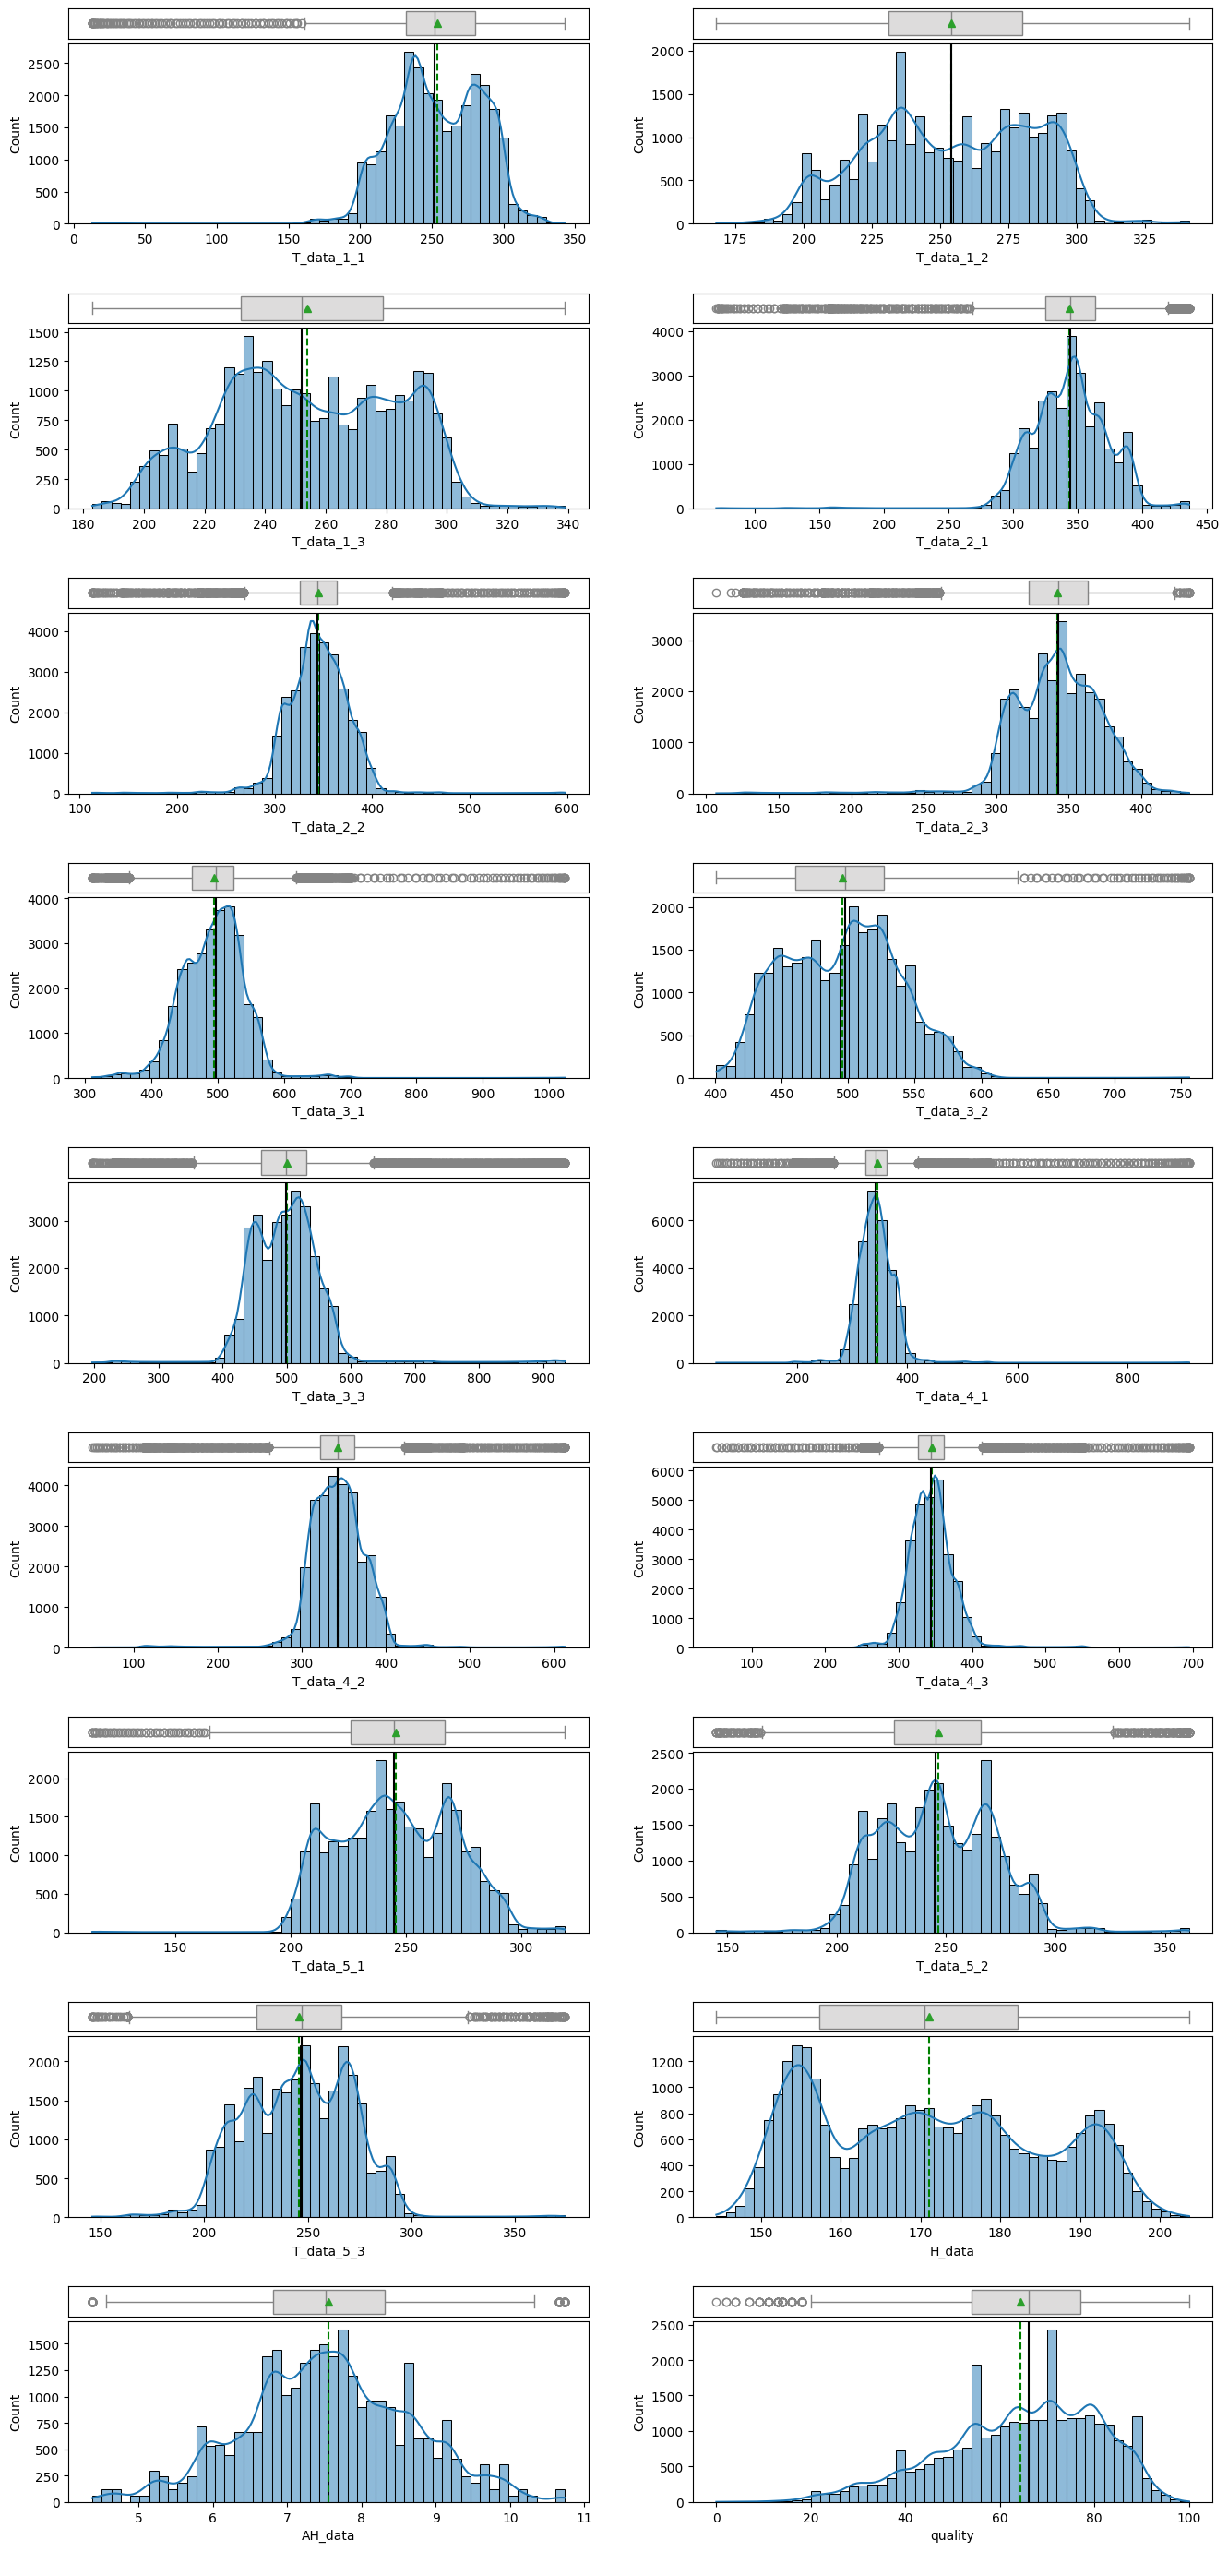

In [312]:
utils.histogram_boxplot_grid(num_col, data, 2)

**Let's check the skewness of the distributions**

In [313]:
# Create an empty DataFrame
skewness_results = {}

# Function to categorize skewness
def categorize_skewness(skew):
    if -0.5 <= skew <= 0.5:
        return 'Fairly Symmetrical'
    elif -1 <= skew < -0.5 or 0.5 < skew <= 1:
        return 'Moderately Skewed'
    else:
        return 'Highly Skewed'

# Check skewness for each column and create a new column indicating the level of skewness
for column in num_col:
    skew_value = data[column].skew()
    skewness_category = categorize_skewness(skew_value)
    skewness_results[column] = {'Skewness': skew_value, 'Level': categorize_skewness(skew_value)}
skewness_results = pd.DataFrame(skewness_results).T

skewness_results

,Skewness,Level
T_data_1_1,-0.837,Moderately Skewed
T_data_1_2,-0.074,Fairly Symmetrical
T_data_1_3,-0.025,Fairly Symmetrical
T_data_2_1,-1.489,Highly Skewed
T_data_2_2,0.060,Fairly Symmetrical
T_data_2_3,-1.185,Highly Skewed
T_data_3_1,1.333,Highly Skewed
T_data_3_2,0.320,Fairly Symmetrical
T_data_3_3,2.020,Highly Skewed
T_data_4_1,4.582,Highly Skewed


**Observations**

* All of the sensor data have outliers, and some are skewed.

**Let's check the within chamber variation**

*Calculate the range, mean and median for each chamber*

In [314]:
# Calculating the difference between the max and min across the specified columns
data['Chamber_1_Range'] = data.apply(lambda row: max(row['T_data_1_1'], row['T_data_1_2'], row['T_data_1_3']) - min(row['T_data_1_1'], row['T_data_1_2'], row['T_data_1_3']), axis=1)
data['Chamber_2_Range'] = data.apply(lambda row: max(row['T_data_2_1'], row['T_data_2_2'], row['T_data_2_3']) - min(row['T_data_2_1'], row['T_data_2_2'], row['T_data_2_3']), axis=1)
data['Chamber_3_Range'] = data.apply(lambda row: max(row['T_data_3_1'], row['T_data_3_2'], row['T_data_3_3']) - min(row['T_data_3_1'], row['T_data_3_2'], row['T_data_3_3']), axis=1)
data['Chamber_4_Range'] = data.apply(lambda row: max(row['T_data_4_1'], row['T_data_4_2'], row['T_data_4_3']) - min(row['T_data_4_1'], row['T_data_4_2'], row['T_data_4_3']), axis=1)
data['Chamber_5_Range'] = data.apply(lambda row: max(row['T_data_5_1'], row['T_data_5_2'], row['T_data_5_3']) - min(row['T_data_5_1'], row['T_data_5_2'], row['T_data_5_3']), axis=1)

# Calculating the mean for each chamber by row
data['Chamber_1_Mean'] = data[['T_data_1_1', 'T_data_1_2', 'T_data_1_3']].mean(axis=1)
data['Chamber_2_Mean'] = data[['T_data_2_1', 'T_data_2_2', 'T_data_2_3']].mean(axis=1)
data['Chamber_3_Mean'] = data[['T_data_3_1', 'T_data_3_2', 'T_data_3_3']].mean(axis=1)
data['Chamber_4_Mean'] = data[['T_data_4_1', 'T_data_4_2', 'T_data_4_3']].mean(axis=1)
data['Chamber_5_Mean'] = data[['T_data_5_1', 'T_data_5_2', 'T_data_5_3']].mean(axis=1)

# Calculating the median for each chamber by row
data['Chamber_1_Median'] = data[['T_data_1_1', 'T_data_1_2', 'T_data_1_3']].median(axis=1)
data['Chamber_2_Median'] = data[['T_data_2_1', 'T_data_2_2', 'T_data_2_3']].median(axis=1)
data['Chamber_3_Median'] = data[['T_data_3_1', 'T_data_3_2', 'T_data_3_3']].median(axis=1)
data['Chamber_4_Median'] = data[['T_data_4_1', 'T_data_4_2', 'T_data_4_3']].median(axis=1)
data['Chamber_5_Median'] = data[['T_data_5_1', 'T_data_5_2', 'T_data_5_3']].median(axis=1)


*Create a function to show mulitple plots in one graph*

In [315]:
import matplotlib.gridspec as gridspec

def kde_trend_grid(data, col1, col2, col3, col4 = None, col5 = None, col6=None, title = None, type = 'Sensor', ncat=3):
    
    # Create the 2x2 grid plot
    
    if col6:
        fig = plt.figure(figsize=(15, 7))
        gs = gridspec.GridSpec(2, 2, width_ratios=[1, 5], height_ratios=[1, .75]) 
    else:
        fig = plt.figure(figsize=(15, 5))
        gs = gridspec.GridSpec(1, 2, width_ratios=[1, 5]) 

    # Creating subplots using the GridSpec layout
    ax0 = plt.subplot(gs[0,0])
    ax1 = plt.subplot(gs[0, 1], sharey=ax0)
    
    if col6:
        ax2 = plt.subplot(gs[1, 1], sharex=ax1)

    ax0.set_ylabel('Value', fontsize=12)
    ax0.grid(True, which='both', axis='y', linestyle='--', linewidth=0.5)
    ax0.tick_params(axis='y', labelsize=8)
    ax0.tick_params(axis='x', labelsize=8)
    ax0.set_xlabel('Density', fontsize=12)
    
    # Overlapped KDE Plot
    sns.kdeplot(data, y=data[col1], shade=True, color="r", ax=ax0, label=f"{type} 1")
    sns.kdeplot(data, y=data[col2], shade=True, color="g", ax=ax0, label=f"{type} 2")
    sns.kdeplot(data, y=data[col3], shade=True, color="b", ax=ax0, label=f"{type} 3")

    if ncat == 5:
        sns.kdeplot(data, y=data[col4], shade=True, color="brown", ax=ax0, label=f"{type} 4")
        sns.kdeplot(data, y=data[col5], shade=True, color="y", ax=ax0, label=f"{type} 5")

    # Trend Chart
    ax1.grid(True, which='both', axis='y', linestyle='--', linewidth=0.5)
    
    if col6:
        ax1.tick_params(labelbottom=False, bottom=False, labelleft=False, left=False)
    else:
        ax1.tick_params(labelleft=False, left=False)
        ax1.tick_params(axis='x', labelsize=8)
        ax1.set_xlabel('Index', fontsize=12)

    ax1.plot(data.index, data[col1], color="r")
    ax1.plot(data.index, data[col2], color="g")
    ax1.plot(data.index, data[col3], color="b")

    if ncat == 5:
        ax1.plot(data.index, data[col4], color="brown")
        ax1.plot(data.index, data[col5], color="y")

    if col6:
        # Trend Chart - Range
        ax2.grid(True, which='both', axis='y', linestyle='--', linewidth=0.5)
        ax2.tick_params(axis='y', labelsize=8)
        ax2.set_ylabel('Range', fontsize=12)
        ax2.tick_params(axis='x', labelsize=8)
        ax2.set_xlabel('Index', fontsize=12)
        
        ax2.plot(data.index, data[col6], color='grey')

    # Adjust layout
    # Adjust subplot parameters to give the legend some room
    plt.subplots_adjust(hspace=0, wspace=0)

    # Creating a legend for the whole figure
    handles, labels = [], []
    for ax in fig.axes:
        for handle, label in zip(*ax.get_legend_handles_labels()):
            handles.append(handle)
            labels.append(label)
    fig.legend(handles, labels, loc='center', bbox_to_anchor=(.5, .95), ncol=5)

    plt.suptitle(title,fontsize=16, y=1.025)
    #plt.tight_layout()
    plt.show()


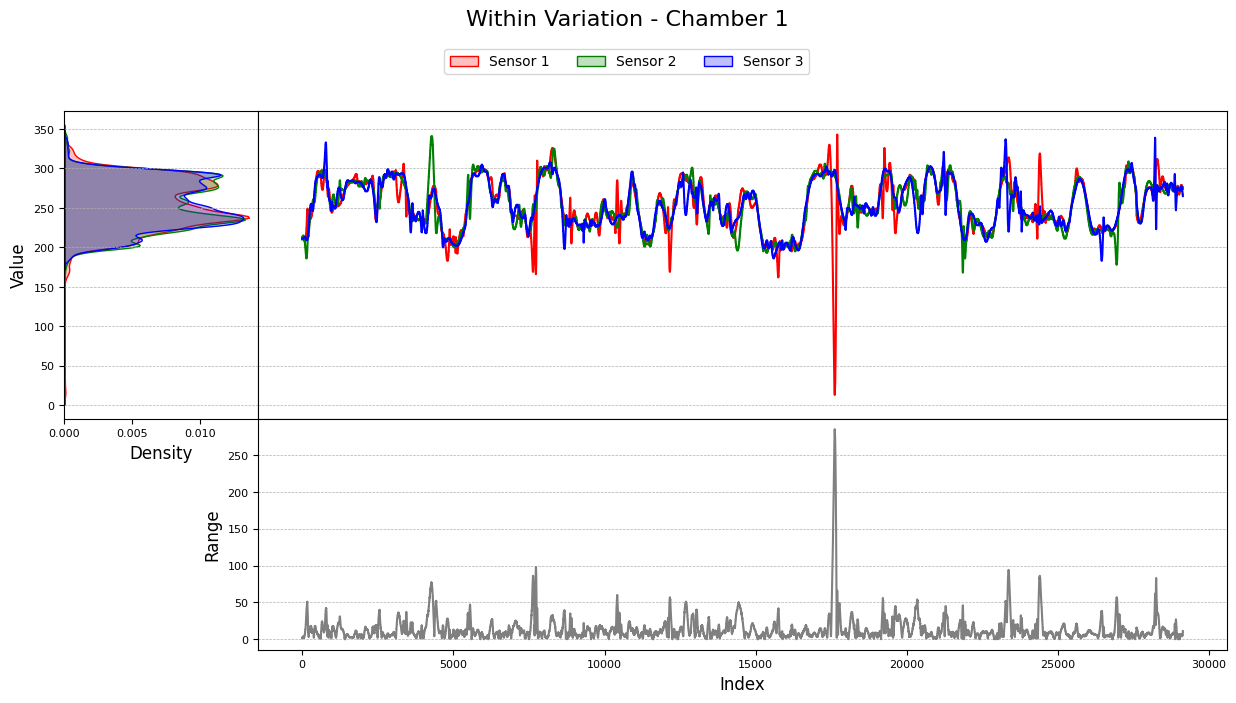

In [316]:
kde_trend_grid(data, col1='T_data_1_1', col2='T_data_1_2', col3='T_data_1_3', col6='Chamber_1_Range', title='Within Variation - Chamber 1', type='Sensor', ncat=3)

**Observations**
* The temperatures for each sensor seem to track with one another. There are some differences in the same batch indicating possible senor measurement error.
* The sensor distributions overlap pretty well.

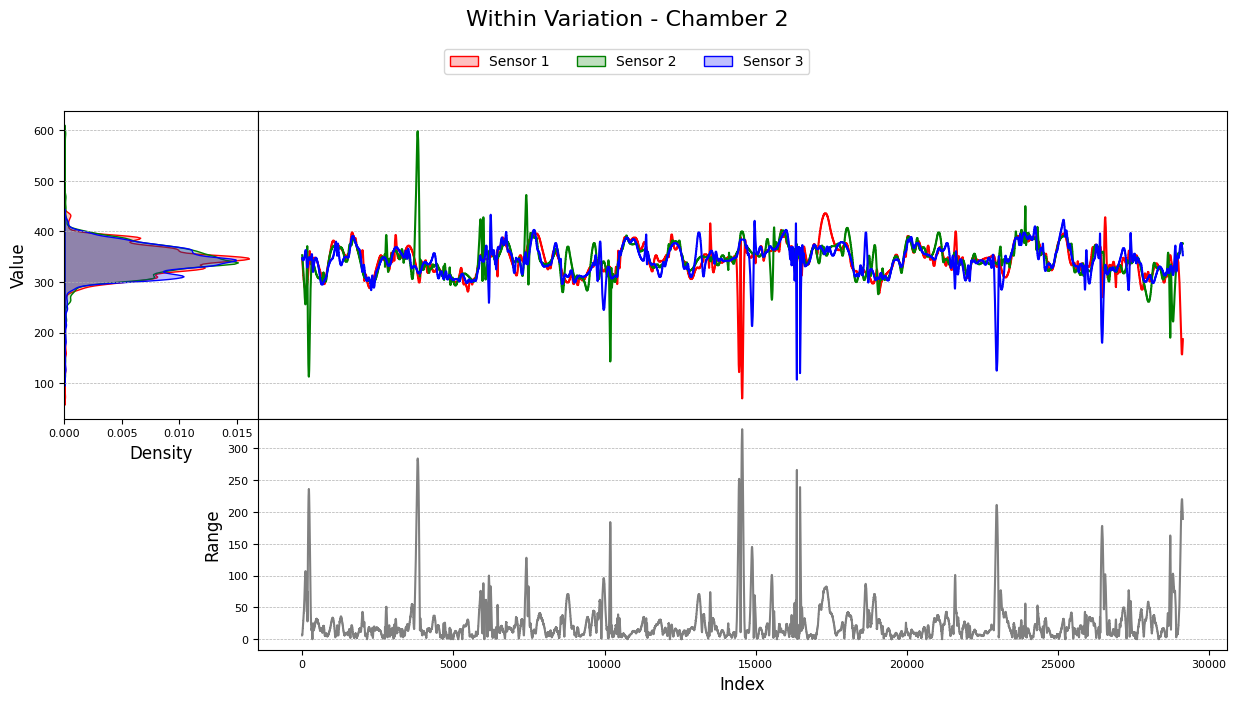

In [317]:
kde_trend_grid(data, col1='T_data_2_1', col2='T_data_2_2', col3='T_data_2_3', col6='Chamber_2_Range', title='Within Variation - Chamber 2', type='Sensor', ncat=3)

**Observations**
* The temperatures for each sensor seem to track with one another. There are some differences in the same batch indicating possible senor measurement error.
* There is more variability with Chamber 2 than 1.
* The sensor distributions overlap pretty well.

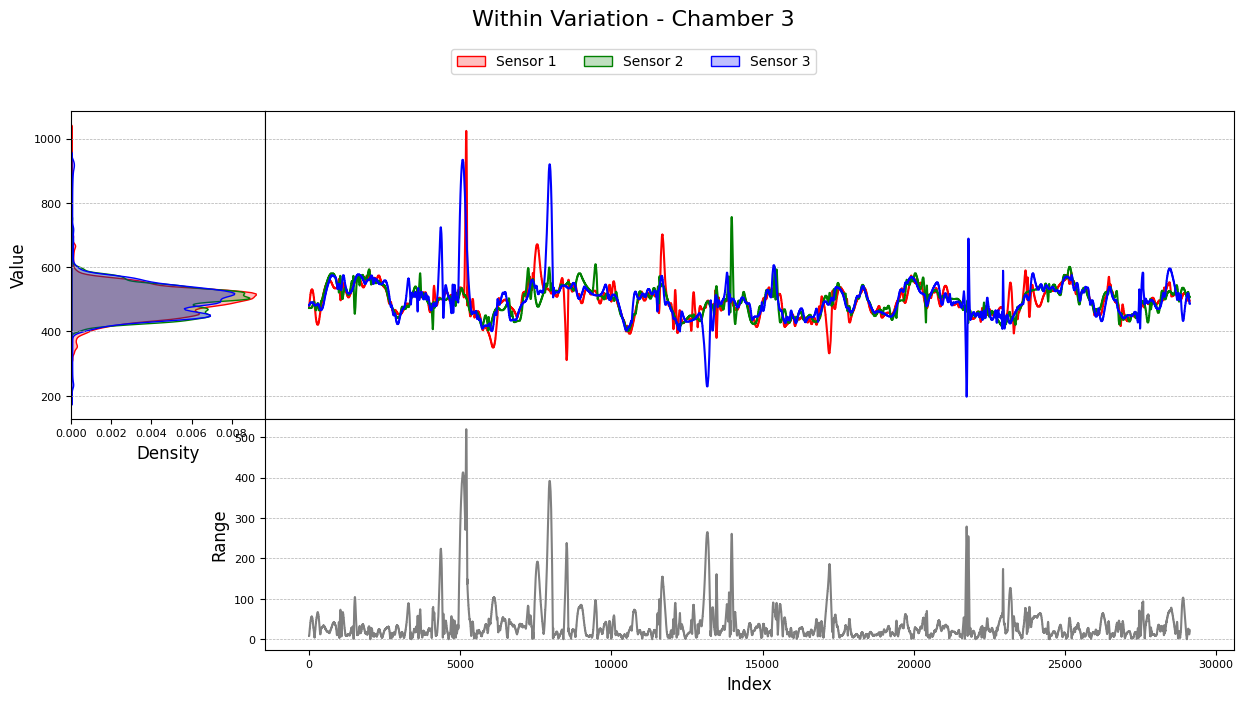

In [318]:
kde_trend_grid(data, col1='T_data_3_1', col2='T_data_3_2', col3='T_data_3_3', col6='Chamber_3_Range', title='Within Variation - Chamber 3', type='Sensor', ncat=3)

**Observations**
* The temperatures for each sensor seem to track with one another. There are some differences in the same batch indicating possible senor measurement error.
* The sensor distributions overlap pretty well.
* There are a few peaks above 800 that will need to be tranformed.

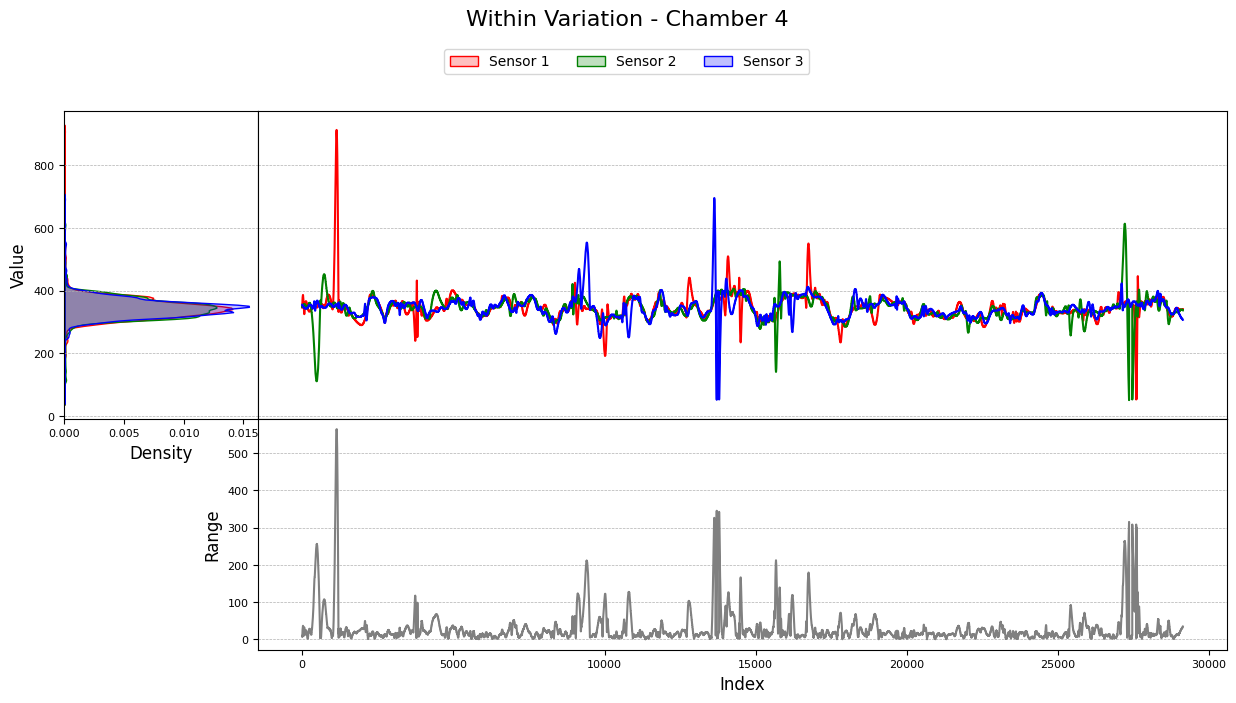

In [319]:
kde_trend_grid(data, col1='T_data_4_1', col2='T_data_4_2', col3='T_data_4_3', col6='Chamber_4_Range', title='Within Variation - Chamber 4', type='Sensor', ncat=3)

**Observations**
* The temperatures for each sensor seem to track with one another. There are some differences in the same batch indicating possible senor measurement error.
* The sensor distributions overlap pretty well.

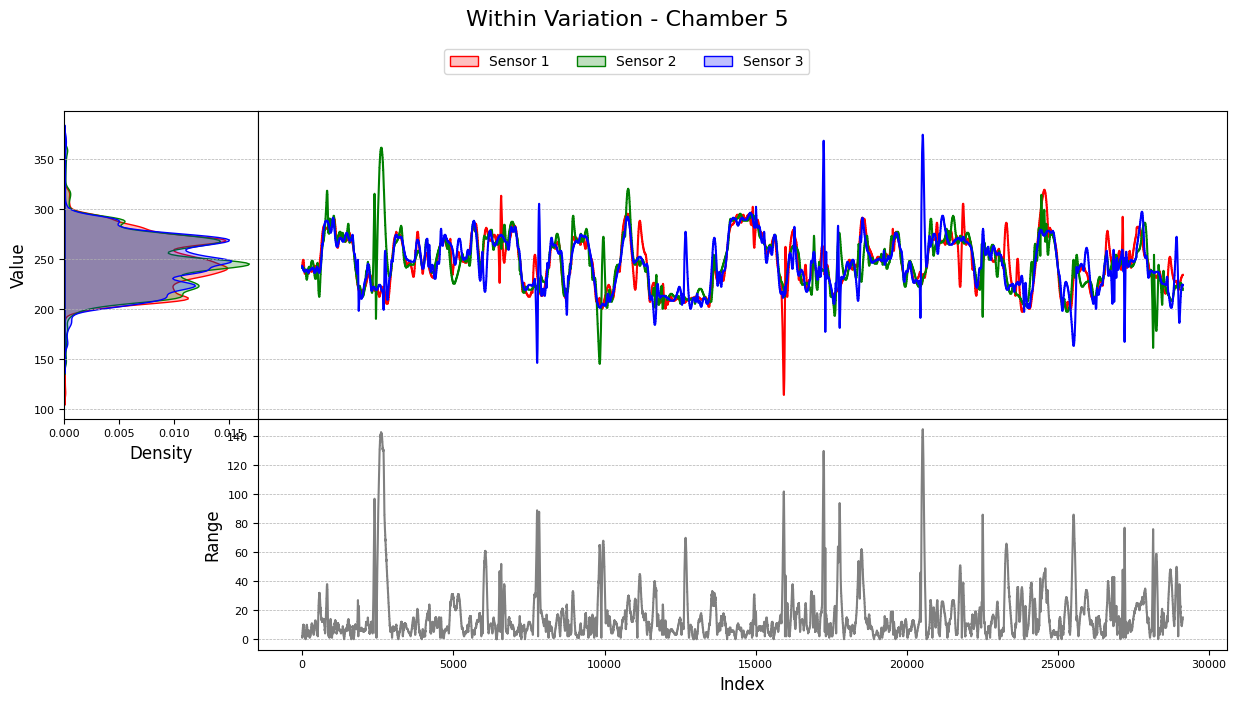

In [320]:
kde_trend_grid(data, col1='T_data_5_1', col2='T_data_5_2', col3='T_data_5_3', col6='Chamber_5_Range', title='Within Variation - Chamber 5', type='Sensor', ncat=3)

**Observations**
* The temperatures for each sensor seem to track with one another. There are some differences in the same batch indicating possible senor measurement error.
* The sensor distributions overlap pretty well.

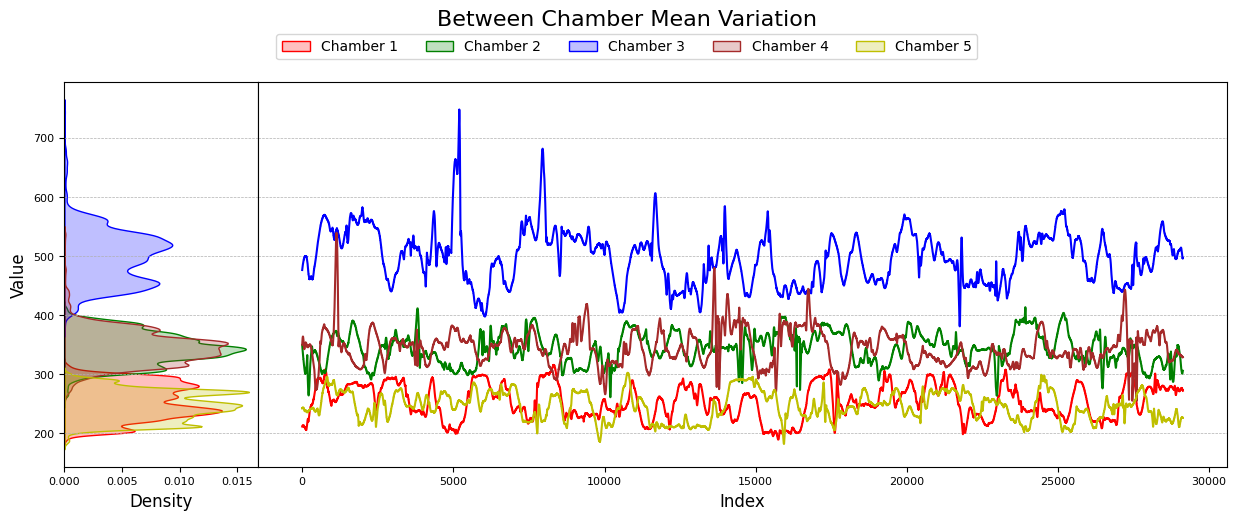

In [321]:
kde_trend_grid(data, col1='Chamber_1_Mean', col2='Chamber_2_Mean', col3='Chamber_3_Mean', col4='Chamber_4_Mean', col5='Chamber_5_Mean', title='Between Chamber Mean Variation', type='Chamber', ncat=5)

**Observations**
* There are 3 main distributions. Chamber 3, Chambers 2 & 4, and Chambers 1 & 5.
* Chamber 3 seems to have variability than the other chambers

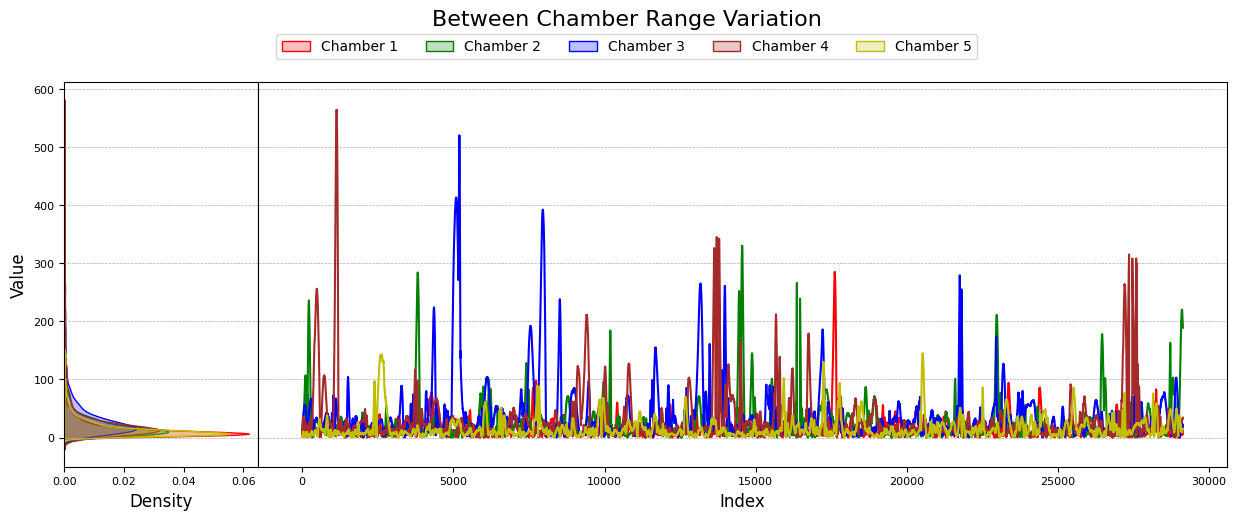

In [322]:
kde_trend_grid(data, col1='Chamber_1_Range', col2='Chamber_2_Range', col3='Chamber_3_Range', col4='Chamber_4_Range', col5='Chamber_5_Range', title='Between Chamber Range Variation', type='Chamber', ncat=5)

**Observations**
* The in chamber range is highly variable. This could be there is measurement error with the sensors.
* We should look at a cutoff value of range to wither impute or delete rows where is possible measurement error. A possible cutiff value is 100.

### **Bi-Variate Analysis**

#### **Correlation Study**

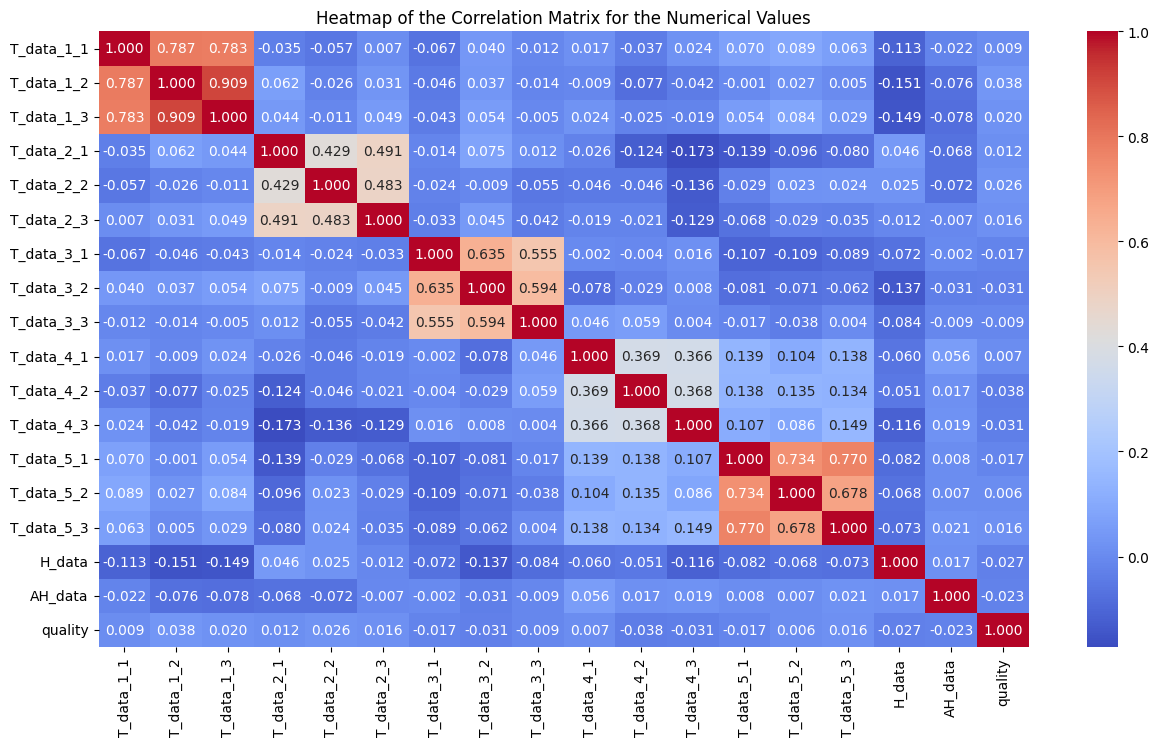

In [323]:
#create a correlation matrix and plot it
cmat = utils.corr_matrix(data[num_col], figsize=(15,8))

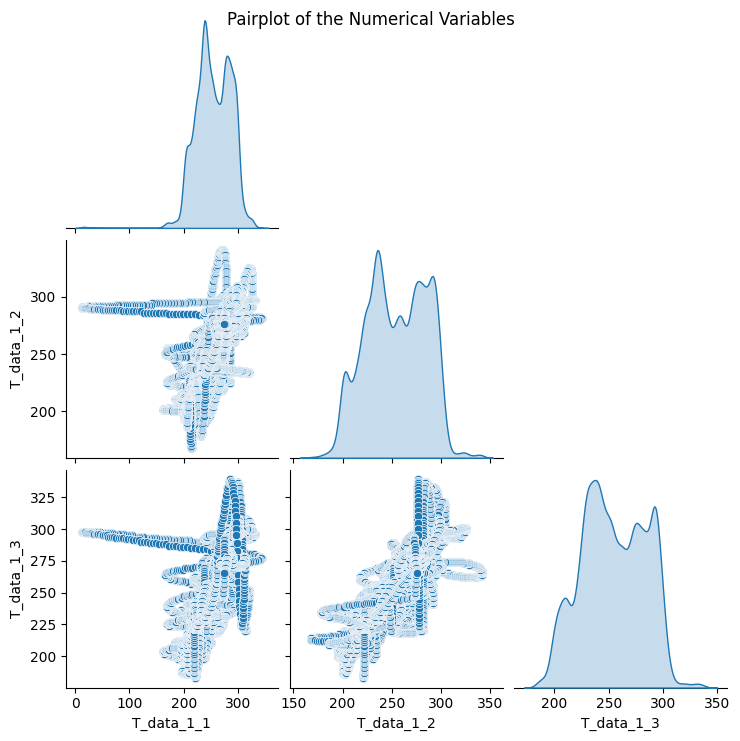

In [324]:
# use a pair plot to look at the distrubution and the correlation between the numeric variables
utils.pplot(data, ['T_data_1_1','T_data_1_2','T_data_1_3'])

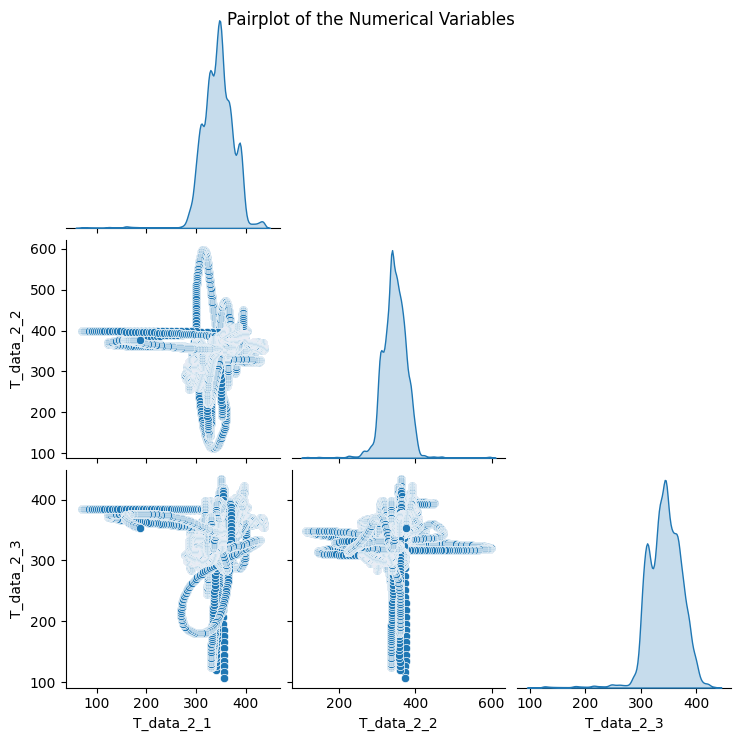

In [325]:
# use a pair plot to look at the distrubution and the correlation between the numeric variables
utils.pplot(data, ['T_data_2_1','T_data_2_2','T_data_2_3'])

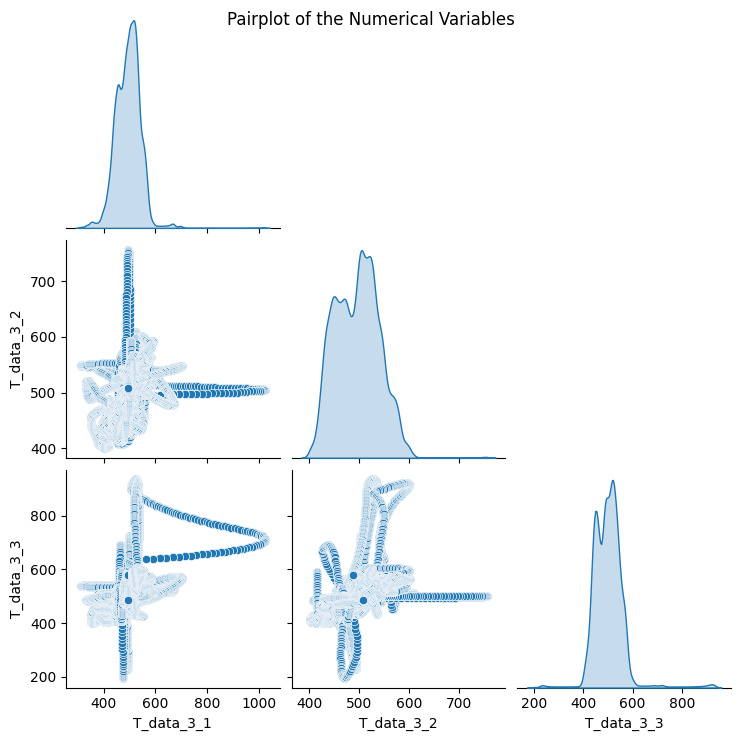

In [326]:
# use a pair plot to look at the distrubution and the correlation between the numeric variables
utils.pplot(data, ['T_data_3_1','T_data_3_2','T_data_3_3'])

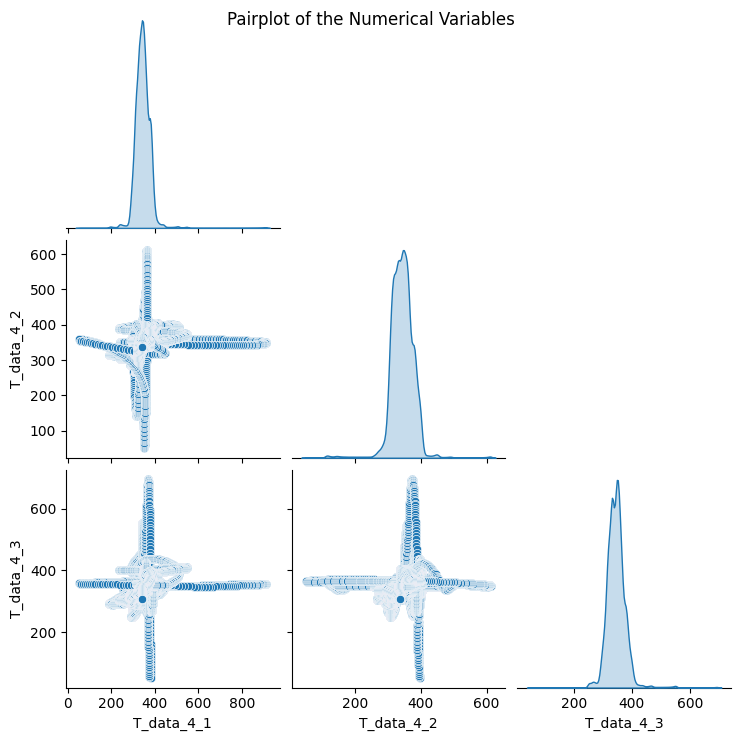

In [327]:
# use a pair plot to look at the distrubution and the correlation between the numeric variables
utils.pplot(data, ['T_data_4_1','T_data_4_2','T_data_4_3'])

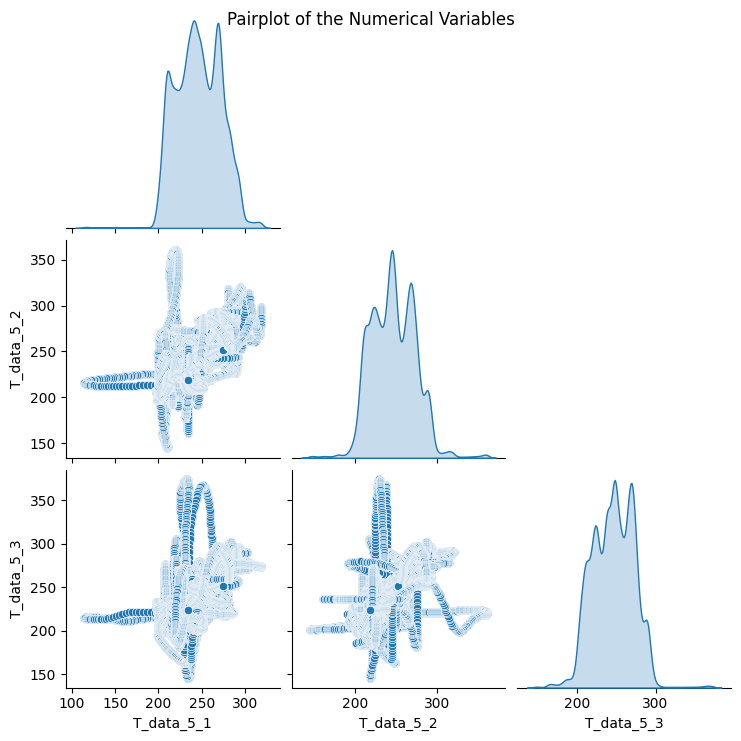

In [328]:
# use a pair plot to look at the distrubution and the correlation between the numeric variables
utils.pplot(data, ['T_data_5_1','T_data_5_2','T_data_5_3'])

**Observations**
* There some interesting patterns observed in the scatter plots. Since these plots are sensors from the same chamber, there is a possibility that the patterns are show when the sensors are having measurement issues. In general the sensors should track each other pretty well as we have seen in the trends.

## Model Selection

## Metric Selection

## Feature Engineering / Data Preparation



1. Rows with missing values
2. Data imputation
3. Data Scaling

### Let's analyse and mitigate rows with muplitple missing values or Impute values that look like measurement error

**Let's replace cell values with the mean value when the value range is above 100 for the index, chamber.**

**Data filtering, Imputation - Method 1**

Here we will just filter the dataframe where the range for any chamber is under 100. We will drop any row that has a null vlaue.

In [361]:
columns_to_filter = ['Chamber_1_Range','Chamber_2_Range','Chamber_3_Range','Chamber_4_Range','Chamber_5_Range']
condition = data[columns_to_filter] < 100
combined_condition = condition.all(axis=1)
dt1 = data[combined_condition]

In [362]:
dt1.dropna(inplace=True)

Here we will drop the created columns so the the dt1 dataframe is ready for modelling

In [363]:
columns_to_drop = ['Chamber_1_Range', 'Chamber_2_Range', 'Chamber_3_Range','Chamber_4_Range','Chamber_5_Range',
         'Chamber_1_Mean', 'Chamber_2_Mean', 'Chamber_3_Mean','Chamber_4_Mean','Chamber_5_Mean',
         'Chamber_1_Median', 'Chamber_2_Median', 'Chamber_3_Median','Chamber_4_Median','Chamber_5_Median']
dt1.drop(columns=columns_to_drop, axis=1, inplace=True)

**Custom Imputation - Method 2**

We know what the clusters are, so we do not need KNN for imputation. The clusters are the chambers and the batches (rows). So for every batch, look at the statistics for each chamber, test if a value is outside of some limit, and if it is replace the value with the median.

In [335]:
dt2 = data.copy()

In [337]:
# Columns to check for the condition.
columns_to_check = [['T_data_1_1', 'T_data_1_2', 'T_data_1_3'], 
                    ['T_data_2_1', 'T_data_2_2', 'T_data_2_3'],
                    ['T_data_3_1', 'T_data_3_2', 'T_data_3_3'],
                    ['T_data_4_1', 'T_data_4_2', 'T_data_4_3'],
                    ['T_data_5_1', 'T_data_5_2', 'T_data_5_3']]

# Function to find outliers and replace them with row mean
def replace_outliers(row):
    # Applying the condition and replacement.
    for index, group in enumerate(columns_to_check):
        # Apply replace_outliers function to each row
        selected_values = row[group]
        mean_val = selected_values.mean()
        median_val =selected_values.median()
        min_val = selected_values.min()
        max_val = selected_values.max()
        range_val = max_val - min_val
        std_val = selected_values.std()
        limith = mean_val + (std_val*.75)
        limitl = mean_val - (std_val*.75) 
            
        if range_val > 100:
            for col in group:
                #print(col, range_val)
                if row[col] < limitl or row[col] > limith:
                    row[col] = median_val
    return row

dt2 = dt2.apply(replace_outliers, axis=1)


After the median replacement, it is possible that the three sensors themselves are outside the normal distribution. So we will replace the the sensor values with the mean if they are outside of the entire sensor mean for all batches.

In [338]:
# Columns to check for the condition.
columns_to_check = ['T_data_1_1', 'T_data_1_2', 'T_data_1_3', 
                    'T_data_2_1', 'T_data_2_2', 'T_data_2_3',
                    'T_data_3_1', 'T_data_3_2', 'T_data_3_3',
                    'T_data_4_1', 'T_data_4_2', 'T_data_4_3',
                    'T_data_5_1', 'T_data_5_2', 'T_data_5_3']

for column in columns_to_check:
    # Calculate mean and standard deviation for the column
    col_mean = dt2[column].mean()
    col_std = dt2[column].std()
    
    # Define threshold for replacement
    threshold = 3 * col_std
    #print(column, col_mean, col_std, threshold)
    # Replace values where the value is less than or greater than the mean +/- 3 times the standard deviation
    dt2[column] = dt2[column].apply(lambda x: col_mean if (x < col_mean - threshold or x > col_mean + threshold) else x)

Drop the created columns

***We will just confirm the impuations with some of the same plots we did before to ensure we did it correctly.***

In [339]:
columns_to_drop = ['Chamber_1_Range', 'Chamber_2_Range', 'Chamber_3_Range','Chamber_4_Range','Chamber_5_Range',
         'Chamber_1_Mean', 'Chamber_2_Mean', 'Chamber_3_Mean','Chamber_4_Mean','Chamber_5_Mean',
         'Chamber_1_Median', 'Chamber_2_Median', 'Chamber_3_Median','Chamber_4_Median','Chamber_5_Median']
dt2.drop(columns=columns_to_drop, axis=1, inplace=True)

In [340]:
# Calculating the difference between the max and min across the specified columns
dt2['Chamber_1_Range'] = dt2.apply(lambda row: max(row['T_data_1_1'], row['T_data_1_2'], row['T_data_1_3']) - min(row['T_data_1_1'], row['T_data_1_2'], row['T_data_1_3']), axis=1)
dt2['Chamber_2_Range'] = dt2.apply(lambda row: max(row['T_data_2_1'], row['T_data_2_2'], row['T_data_2_3']) - min(row['T_data_2_1'], row['T_data_2_2'], row['T_data_2_3']), axis=1)
dt2['Chamber_3_Range'] = dt2.apply(lambda row: max(row['T_data_3_1'], row['T_data_3_2'], row['T_data_3_3']) - min(row['T_data_3_1'], row['T_data_3_2'], row['T_data_3_3']), axis=1)
dt2['Chamber_4_Range'] = dt2.apply(lambda row: max(row['T_data_4_1'], row['T_data_4_2'], row['T_data_4_3']) - min(row['T_data_4_1'], row['T_data_4_2'], row['T_data_4_3']), axis=1)
dt2['Chamber_5_Range'] = dt2.apply(lambda row: max(row['T_data_5_1'], row['T_data_5_2'], row['T_data_5_3']) - min(row['T_data_5_1'], row['T_data_5_2'], row['T_data_5_3']), axis=1)

# Calculating the mean for each chamber by row
dt2['Chamber_1_Mean'] = dt2[['T_data_1_1', 'T_data_1_2', 'T_data_1_3']].mean(axis=1)
dt2['Chamber_2_Mean'] = dt2[['T_data_2_1', 'T_data_2_2', 'T_data_2_3']].mean(axis=1)
dt2['Chamber_3_Mean'] = dt2[['T_data_3_1', 'T_data_3_2', 'T_data_3_3']].mean(axis=1)
dt2['Chamber_4_Mean'] = dt2[['T_data_4_1', 'T_data_4_2', 'T_data_4_3']].mean(axis=1)
dt2['Chamber_5_Mean'] = dt2[['T_data_5_1', 'T_data_5_2', 'T_data_5_3']].mean(axis=1)

# Calculating the median for each chamber by row
dt2['Chamber_1_Median'] = dt2[['T_data_1_1', 'T_data_1_2', 'T_data_1_3']].median(axis=1)
dt2['Chamber_2_Median'] = dt2[['T_data_2_1', 'T_data_2_2', 'T_data_2_3']].median(axis=1)
dt2['Chamber_3_Median'] = dt2[['T_data_3_1', 'T_data_3_2', 'T_data_3_3']].median(axis=1)
dt2['Chamber_4_Median'] = dt2[['T_data_4_1', 'T_data_4_2', 'T_data_4_3']].median(axis=1)
dt2['Chamber_5_Median'] = dt2[['T_data_5_1', 'T_data_5_2', 'T_data_5_3']].median(axis=1)


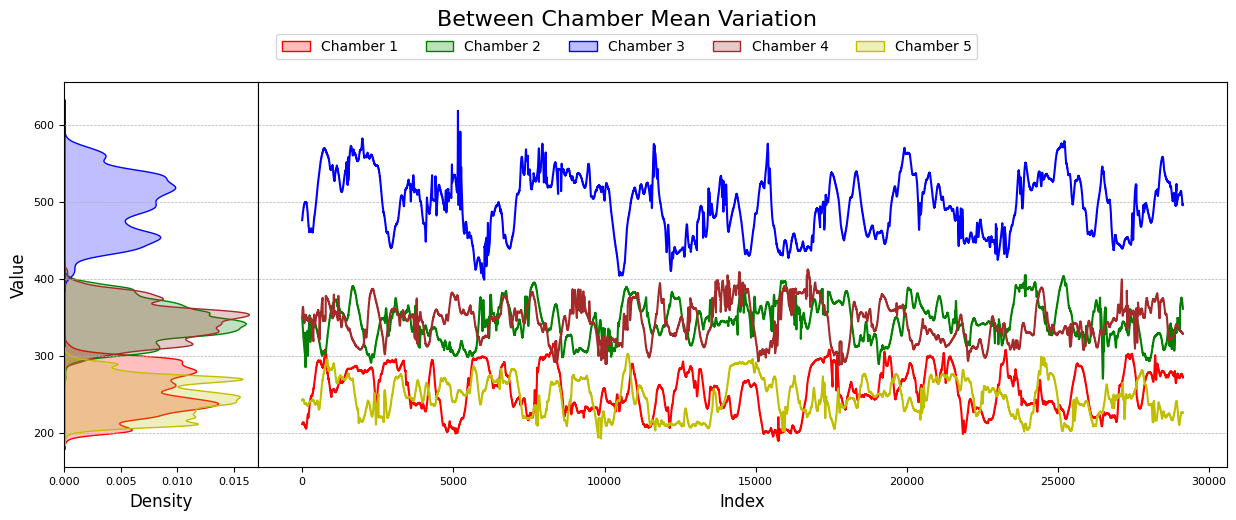

In [341]:
kde_trend_grid(dt2, col1='Chamber_1_Mean', col2='Chamber_2_Mean', col3='Chamber_3_Mean', col4='Chamber_4_Mean', col5='Chamber_5_Mean', title='Between Chamber Mean Variation', type='Chamber', ncat=5)

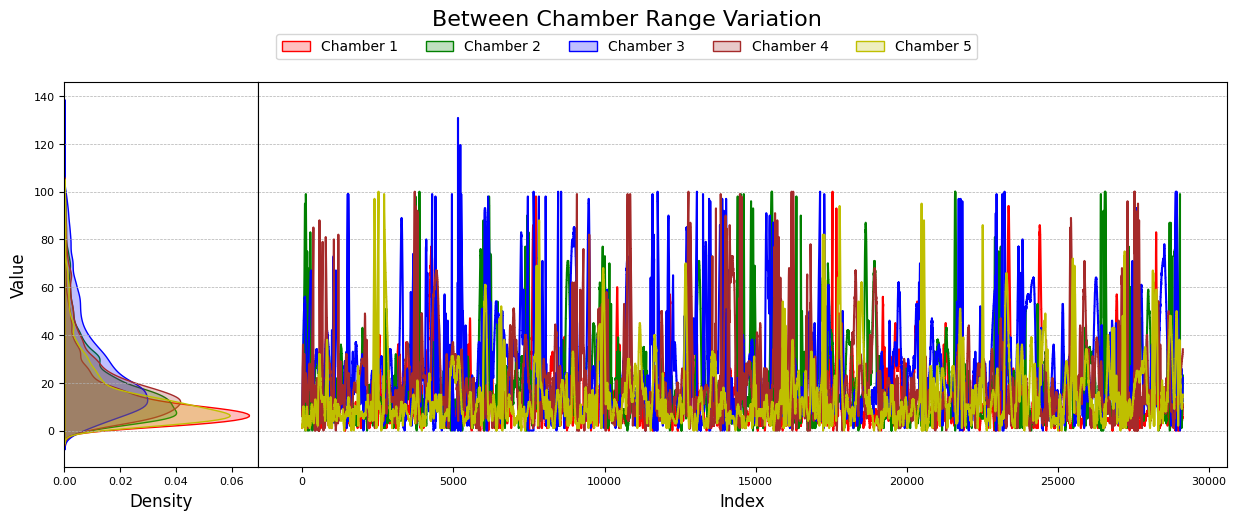

In [342]:
kde_trend_grid(dt2, col1='Chamber_1_Range', col2='Chamber_2_Range', col3='Chamber_3_Range', col4='Chamber_4_Range', col5='Chamber_5_Range', title='Between Chamber Range Variation', type='Chamber', ncat=5)

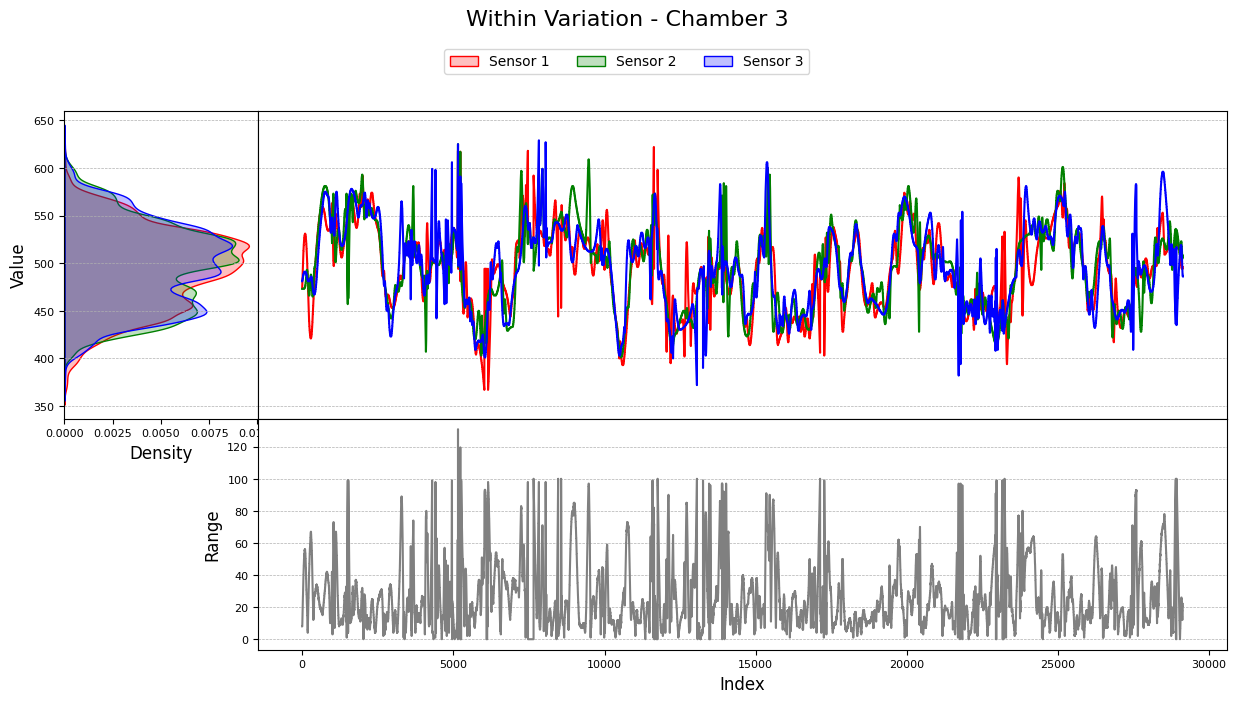

In [343]:
kde_trend_grid(dt2, col1='T_data_3_1', col2='T_data_3_2', col3='T_data_3_3', col6='Chamber_3_Range', title='Within Variation - Chamber 3', type='Sensor', ncat=3)

**Observstions**
* It seems the imputations worked pretty well. Thre chamber trends look like almost normal variability.

Drop the created columns and drop remaining rows that have any missing values

In [344]:
columns_to_drop = ['Chamber_1_Range', 'Chamber_2_Range', 'Chamber_3_Range','Chamber_4_Range','Chamber_5_Range',
         'Chamber_1_Mean', 'Chamber_2_Mean', 'Chamber_3_Mean','Chamber_4_Mean','Chamber_5_Mean',
         'Chamber_1_Median', 'Chamber_2_Median', 'Chamber_3_Median','Chamber_4_Median','Chamber_5_Median']
dt2.drop(columns=columns_to_drop, axis=1, inplace=True)

In [345]:
dt2.dropna(inplace=True)

In [346]:
round(dt2.isnull().sum() / dt2.isnull().count() * 100, 2)

T_data_1_1   0.000
T_data_1_2   0.000
T_data_1_3   0.000
T_data_2_1   0.000
T_data_2_2   0.000
T_data_2_3   0.000
T_data_3_1   0.000
T_data_3_2   0.000
T_data_3_3   0.000
T_data_4_1   0.000
T_data_4_2   0.000
T_data_4_3   0.000
T_data_5_1   0.000
T_data_5_2   0.000
T_data_5_3   0.000
H_data       0.000
AH_data      0.000
quality      0.000
dtype: float64

### Scaling and Model Selection

**Define several scaling and model techniques. Loop through all of the combinations and score performance**

#### ***Scaling Techniques Explained***

1. ***StandardScaler***

- **Purpose:** Aims to scale features to have a mean of 0 and a standard deviation of 1, effectively standardizing the distribution of feature values.
- **How it Works:** This scaler subtracts the mean value of each feature and then divides it by the standard deviation of each feature. 
- **Limitation:** It is sensitive to outliers since outliers can significantly affect the mean and standard deviation of the feature values.

2. ***RobustScaler***

- **Purpose:** Designed to scale features using statistics that are robust to outliers, specifically using the median and the interquartile range.
- **How it Works:** It removes the median and scales the data according to the quantile range (typically the interquartile range, IQR). The IQR is the difference between the 75th and 25th percentiles of the data.
- **Limitation:** While it is robust to outliers, its use of the median and IQR can lead to different scaling behaviors for features with different distributions and may not normalize the data's distribution.

3. ***MinMaxScaler***

- **Purpose:** Scales and translates each feature individually so that it is in the specified range on the training set, typically between zero and one.
- **How it Works:** It subtracts the minimum value of each feature and then divides by the range of that feature. The range is the difference between the original maximum and original minimum value of the feature.
- **Limitation:** It is very sensitive to outliers, as they will significantly affect the minimum and maximum values used for scaling, potentially leading to a narrow interval for the majority of the data.

Choosing the right scaler is crucial for preparing your data for machine learning algorithms, especially when they make specific assumptions about the distribution of your data or when your data includes outliers. The ***StandardScaler*** is best suited for data that is already approximately normally distributed and lacks significant outliers. The ***RobustScaler*** is preferred when your data contains outliers and you need a method that is less sensitive to them. Lastly, the ***MinMaxScaler*** is ideal when you need to normalize the range of your data to a specific scale, such as 0 to 1, though it's important to be mindful of its sensitivity to outliers.

## Initial Model Training and Validation

***The code below will store the metrics***

In [364]:
# Function to compute adjusted R-squared
def adj_r2_score(predictors, targets, predictions):
    r2 = r2_score(targets, predictions)
    n = predictors.shape[0]
    k = predictors.shape[1]
    return 1 - ((1 - r2) * (n - 1) / (n - k - 1))


# Function to compute different metrics to check performance of a regression model
def model_performance_regression(model, predictors, target):
    """
    Function to compute different metrics to check regression model performance

    model: regressor
    predictors: independent variables
    target: dependent variable
    """

    # predicting using the independent variables
    pred = model.predict(predictors)

    r2 = r2_score(target, pred)  # to compute R-squared
    adjr2 = adj_r2_score(predictors, target, pred)  # to compute adjusted R-squared
    rmse = np.sqrt(mean_squared_error(target, pred))  # to compute RMSE
    mae = mean_absolute_error(target, pred)  # to compute MAE

    # creating a dataframe of metrics
    df_perf = pd.DataFrame(
        {
            "RMSE": rmse,
            "MAE": mae,
            "R-squared": r2,
            "Adj. R-squared": adjr2,
        },
        index=[0],
    )

    return df_perf

In [365]:
# since this is the first model scoring we need to clear any existing metrics already built
utils.delete_dataframe_if_exists('metrics_scores')

metrics_scores DataFrame does not exist.


***The code below will loop through all of the combinations of imputation, scaling, sampling and mdelling strategies, and store the metrics***

In [366]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler

#set the random state
rs = 42

# Define scaling techniques
scaling_techniques = {
    'standard': StandardScaler(),
    'minmax': MinMaxScaler(),
    'robust': RobustScaler()
}

# Define classification algorithms
classification_models = {
    'DecisionTree': DecisionTreeRegressor(random_state=rs),
    'RandomForest': RandomForestRegressor(random_state=rs),
    'AdaBoost': AdaBoostRegressor(random_state=rs),
    'GradientBoost': GradientBoostingRegressor(random_state=rs),
    'XGBoost': XGBRegressor(random_state=rs)
}
 
# Reinitialize storage for metrics, now including accuracy, precision, and AUC
metrics_scores_models = {}
metrics_scores = pd.DataFrame()

# Perform the comprehensive analysis for each combination

# loop through the scaling strategies
for scale_strategy, scaler in scaling_techniques.items():
    X = dt1.drop('quality', axis=1)
    y = dt1['quality']
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=rs)
    X_train_scaled = scaler.fit_transform(X_train)
    X_test_scaled = scaler.transform(X_test)

    # loop through the model techniques
    for model_name, model in classification_models.items():
        model.fit(X_train_scaled, y_train)
        score = model_performance_regression(model, X_test_scaled, y_test)

        # Storing the metrics
        metrics_scores_models = {
            'Model Name': model_name,
            'Scale Strategy': scale_strategy,
            "RMSE": score.at[0, 'RMSE'],
            "MAE": score.at[0, 'MAE'],
            "R-squared": score.at[0, 'R-squared'],
            "Adj. R-squared": score.at[0, 'Adj. R-squared'],
        }

        metrics_scores = pd.concat([metrics_scores, pd.DataFrame([metrics_scores_models])], ignore_index=True)


In [367]:
metrics_scores.sort_values(by='R-squared', ascending=False).style.background_gradient(cmap='Greens', subset=['RMSE', 'MAE', 'R-squared', 'Adj. R-squared'], axis=0)

,Model Name,Scale Strategy,RMSE,MAE,R-squared,Adj. R-squared
11,RandomForest,robust,4.400553,3.303183,0.927961,0.927707
1,RandomForest,standard,4.412198,3.313335,0.927579,0.927324
6,RandomForest,minmax,4.414498,3.316599,0.927503,0.927248
5,DecisionTree,minmax,6.268455,4.386345,0.853824,0.853309
10,DecisionTree,robust,6.274391,4.386551,0.853547,0.853031
0,DecisionTree,standard,6.286937,4.400990,0.852960,0.852443
4,XGBoost,standard,8.653874,6.865919,0.721403,0.720422
9,XGBoost,minmax,8.653874,6.865919,0.721403,0.720422
14,XGBoost,robust,8.653874,6.865919,0.721403,0.720422
8,GradientBoost,minmax,14.768870,12.005191,0.188571,0.185715


**Observations**
* Random Forest and Decision Tree has the best performance on the test / validation datasets.

In [368]:
# since this is the first model scoring we need to clear any existing metrics already built
utils.delete_dataframe_if_exists('metrics_scores_tuned')

metrics_scores_tuned DataFrame does not exist.


***We will use the Robust Scaler, and tune the RF and DT models using hyper-parameter GridCVSearch***

In [369]:
from joblib import parallel_backend
from sklearn.model_selection import GridSearchCV

#set the random state
rs = 42

# scale the data
scaler = RobustScaler()
X = dt1.drop('quality', axis=1)
y = dt1['quality']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=rs)
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Define classification algorithms
tclassification_models = {
    'RandomForest': { 
        'Default' : { 
            'model' : RandomForestRegressor(random_state=rs),
            'params' : None
        },
        'Tuned' : {
            'model' : RandomForestRegressor(random_state=rs),
            'params' : {
                'max_depth':[4, 6, 8, 10, None],
                'max_features': ['sqrt','log2', None],
                'n_estimators': [110, 120, 150, 200, 250]
            }
        }
    },
    'DecisionTree': { 
        'Default' : { 
            'model' : DecisionTreeRegressor(random_state=rs),
            'params' : None
        },
        'Tuned' : {
            'model' : DecisionTreeRegressor(random_state=rs),
            'params' : { 
                'max_depth': [2,4,8,16,None],
                'min_samples_leaf': [1, 3, 6, 12, None],
                'max_leaf_nodes' : [5, 10, 15, 20, None],
                'min_impurity_decrease': [0.001, 0.001, .1, .2]
            }
        }
    }
}
# Reinitialize storage for metrics, now including accuracy, precision, and AUC
metrics_scores_models_tuned = {}
metrics_scores_tuned = pd.DataFrame()

# Perform the comprehensive analysis for each combination
# loop through the models
for model_name, mtype in tclassification_models.items():
    # loop through the training type
    for ttype, param in mtype.items():
        if ttype == 'Tuned':
            with parallel_backend(backend='multiprocessing', n_jobs=-1):
                # Choose the type of classifier
                estimator = param['model']
                mparams = param['params']
                scorer = metrics.make_scorer(r2_score) 

                # Run the grid search
                grid_obj = GridSearchCV(estimator, mparams, scoring = scorer, cv = 5)
                grid_obj = grid_obj.fit(X_train_scaled, y_train)

            # Set the classifier to the best combination of parameters
            tmodel = grid_obj.best_estimator_
            tmodel.fit(X_train_scaled, y_train)
        else:
            tmodel =  param['model']
            tmodel.fit(X_train_scaled, y_train)
            
        tscore = model_performance_regression(tmodel, X_test_scaled, y_test)

        # Storing the metrics
        metrics_scores_models_tuned = {
            'Model Name': model_name,
            'Training Type': ttype,
            'Model Parameters' : tmodel,
            "RMSE": tscore.at[0, 'RMSE'],
            "MAE": tscore.at[0, 'MAE'],
            "R-squared": tscore.at[0, 'R-squared'],
            "Adj. R-squared": tscore.at[0, 'Adj. R-squared'],
        }
        #print(metrics_scores_models_tuned)
        metrics_scores_tuned = pd.concat([metrics_scores_tuned, pd.DataFrame([metrics_scores_models_tuned])], ignore_index=True)

In [370]:
metrics_scores_tuned.sort_values(by='R-squared', ascending=False).style.background_gradient(cmap='Greens', subset=['RMSE', 'MAE', 'R-squared', 'Adj. R-squared'], axis=0)

,Model Name,Training Type,Model Parameters,RMSE,MAE,R-squared,Adj. R-squared
1,RandomForest,Tuned,"RandomForestRegressor(max_features='sqrt', n_estimators=250, random_state=42)",4.086599,3.068402,0.937873,0.937654
0,RandomForest,Default,RandomForestRegressor(random_state=42),4.400553,3.303183,0.927961,0.927707
2,DecisionTree,Default,DecisionTreeRegressor(random_state=42),6.274391,4.386551,0.853547,0.853031
3,DecisionTree,Tuned,"DecisionTreeRegressor(min_impurity_decrease=0.001, random_state=42)",6.440702,4.614842,0.845680,0.845137


**Observations**
* A tuned RandomForest model has the highest R2 and lowest errors.

## Final Model Selection

***Look at some metric graphs, and feature imprtances***

Lets first re-prepare the the dataset 

Scale the data and create training and test datasets

In [376]:
#set the random state
rs = 42

# scale the data
scaler = RobustScaler()
X = dt1.drop('quality', axis=1)
y = dt1['quality']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=rs)
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


Train the model

In [377]:
rf = RandomForestRegressor(max_features='sqrt', n_estimators=250, random_state=42)
rf.fit(X_train_scaled, y_train)

RandomForestRegressor(max_features='sqrt', n_estimators=250, random_state=42)

In [378]:
tscore = model_performance_regression(rf, X_test_scaled, y_test)
tscore

,RMSE,MAE,R-squared,Adj. R-squared
0,4.087,3.068,0.938,0.938


In [379]:
# predicting using the independent variables
y_pred = rf.predict(X_test_scaled)

In [380]:
# since this is the first model scoring we need to clear any existing metrics already built
utils.delete_dataframe_if_exists('dataz')

dataz DataFrame does not exist.


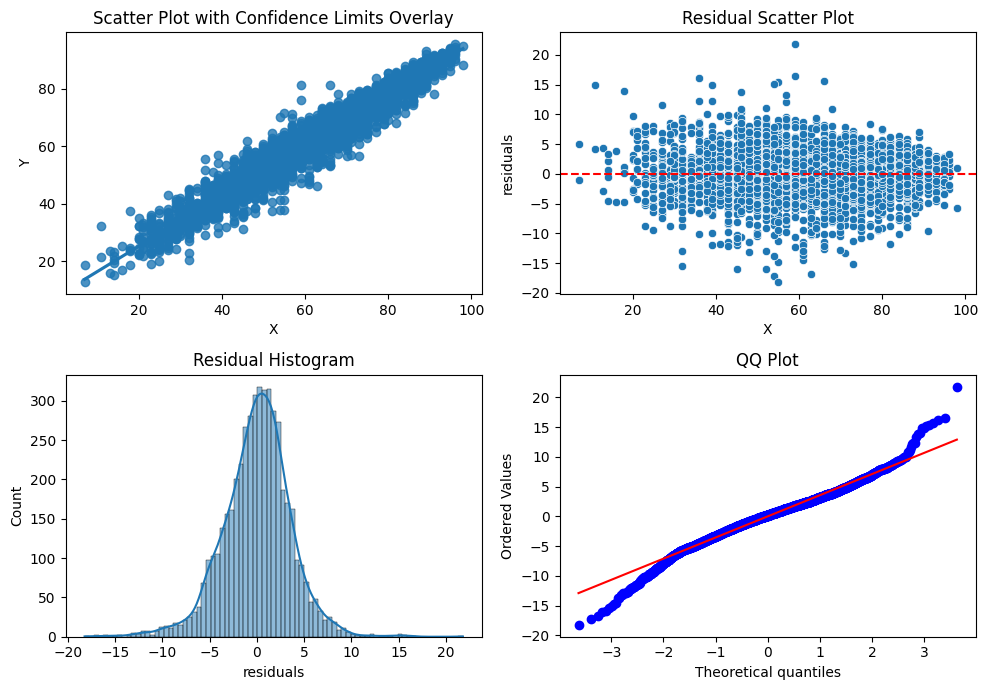

In [381]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats as stats

dataz = pd.DataFrame({'X': y_test, 'Y': y_pred})

# Fit a linear regression model
slope, intercept, r_value, p_value, std_err = stats.linregress(dataz['X'], dataz['Y'])
dataz['Y_pred'] = intercept + slope * dataz['X']
dataz['residuals'] = dataz['Y'] - dataz['Y_pred']

# Create the 2x2 grid plot
fig, axes = plt.subplots(2, 2, figsize=(10, 7))

# Scatter plot with confidence limits overlay
sns.regplot(x='X', y='Y', data=dataz, ax=axes[0, 0])
axes[0, 0].set_title('Scatter Plot with Confidence Limits Overlay')

# Residual scatter plot
sns.scatterplot(x='X', y='residuals', data=dataz, ax=axes[0, 1])
axes[0, 1].axhline(y=0, color='r', linestyle='--')
axes[0, 1].set_title('Residual Scatter Plot')

# Residual histogram
sns.histplot(dataz['residuals'], kde=True, ax=axes[1, 0])
axes[1, 0].set_title('Residual Histogram')

# QQ plot
stats.probplot(dataz['residuals'], dist="norm", plot=axes[1, 1])
axes[1, 1].set_title('QQ Plot')

# Adjust layout
plt.tight_layout()
plt.show()



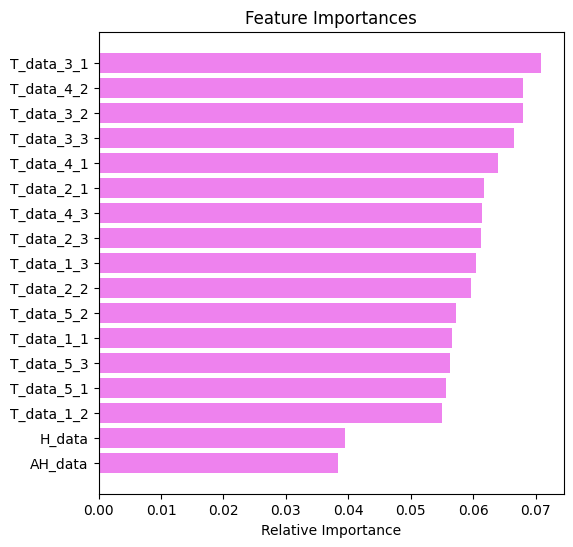

In [382]:
feature_names = X_train.columns
importances = rf.feature_importances_
indices = np.argsort(importances)

plt.figure(figsize=(6, 6))
plt.title("Feature Importances")
plt.barh(range(len(indices)), importances[indices], color="violet", align="center")
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel("Relative Importance")
plt.show()

**Observations**
* The model looks liek it predicts well with low error.
* The most important features are sensors within chamber 3, then 4 & 2, then chanber 1 & 5. 
  * This matches what we saw earlier in our between chamber varaince analysis.

## Insights and Recommendations

***Insights***

* The most balanced, overall best performing model in my opinion was the ***Tuned Random Forest model***. 
* This model had the ***highest R2 score of ~94%***
* Chamber 3 has the largest effect on the quality of the beans.

***Recomendations***

* There are large temperature variations within each chamber. I would suggest to imlement better process control keep the chamber temperature for each batch.
* I would also suggest a DOE (Design of Experiement) for to vary the 5 different chamber temperatures to find the optimal mean temperatures for each chamber. 

